<a href="https://colab.research.google.com/github/3milxalton/skills-github-pages/blob/main/StrikemapAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

interactive(children=(Dropdown(description='Select Zone:', options=(('Red (Own Tryline - 22m)', 0), ('Blue (22…

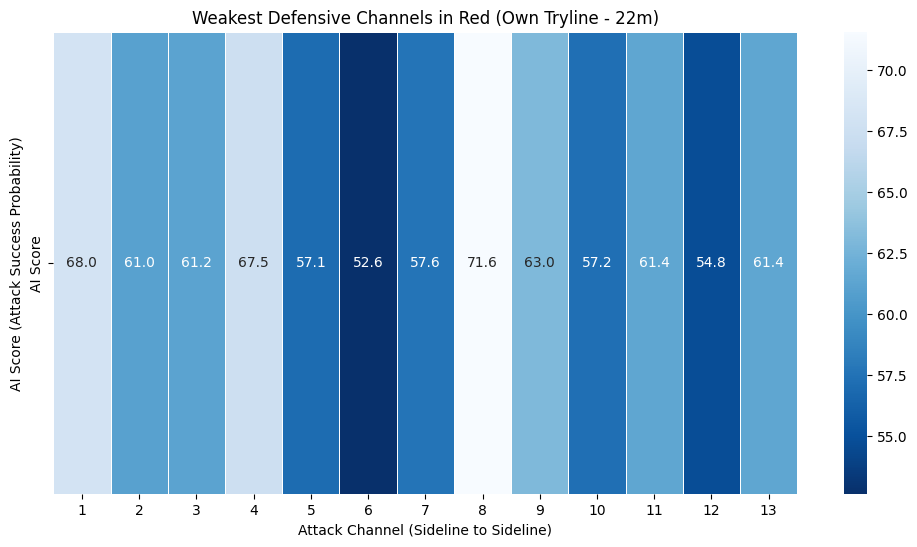

In [12]:
# Install ipywidgets in Colab if not already installed
!pip install ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from PIL import Image

# Load dataset
df_uploaded = pd.read_csv("/content/Rugby_AI_Dataset.csv") #INSERT YOUR CSV FILEPATH HERE#

# Convert Zone names to numeric values
zone_mapping = {"Red": 0, "Blue": 1, "Yellow": 2, "Green": 3}
df_uploaded["Zone"] = df_uploaded["Zone"].map(zone_mapping)

# Define zone labels
zone_labels = {
    0: "Red (Own Tryline - 22m)",
    1: "Blue (22m - 50m)",
    2: "Yellow (50m - Opp. 22m)",
    3: "Green (Opp. 22m - Tryline)"
}

# Create options list for dropdown (list of tuples with (label, value))
dropdown_options = [(zone_labels[i], i) for i in sorted(df_uploaded["Zone"].unique())]

# Create dropdown with proper options format
zone_selector = widgets.Dropdown(
    options=dropdown_options,
    value=0,  # Set default value to 0 (Red zone)
    description="Select Zone:"
)

# Function to update visualization based on selected zone
def update_visualization(selected_zone):
    # Filter dataset based on the selected zone
    df_zone = df_uploaded[df_uploaded["Zone"] == selected_zone]

    # Pivot DataFrame for visualization
    heatmap_data = df_zone.pivot_table(index="Channel", values="AI Score", aggfunc="mean")
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Create figure and overlay heatmap on rugby field
    fig, ax = plt.subplots(figsize=(12, 6))

    # Load and display field image
    try:
        field_image = Image.open(field_image_path)
        ax.imshow(field_image, extent=[1, 13, 30, 90], aspect="auto", alpha=0.5)
    except:
        print("Warning: Could not load field image. Displaying heatmap only.")

    # Generate heatmap
    sns.heatmap(heatmap_data.T, cmap="Blues_r", annot=True, fmt=".1f", linewidths=0.5, cbar=True, ax=ax)

    # Formatting
    ax.set_title(f"Weakest Defensive Channels in {zone_labels[selected_zone]}")
    ax.set_xlabel("Attack Channel (Sideline to Sideline)")
    ax.set_ylabel("AI Score (Attack Success Probability)")

    plt.show()

# Create and display the interactive widget
interactive_plot = widgets.interactive(update_visualization, selected_zone=zone_selector)
display(interactive_plot)

# Generate initial visualization
update_visualization(0)  # Start with Red zone (0)

interactive(children=(Dropdown(description='Select Zone:', options=(('Red (Own Tryline - 22m)', 0), ('Blue (22…

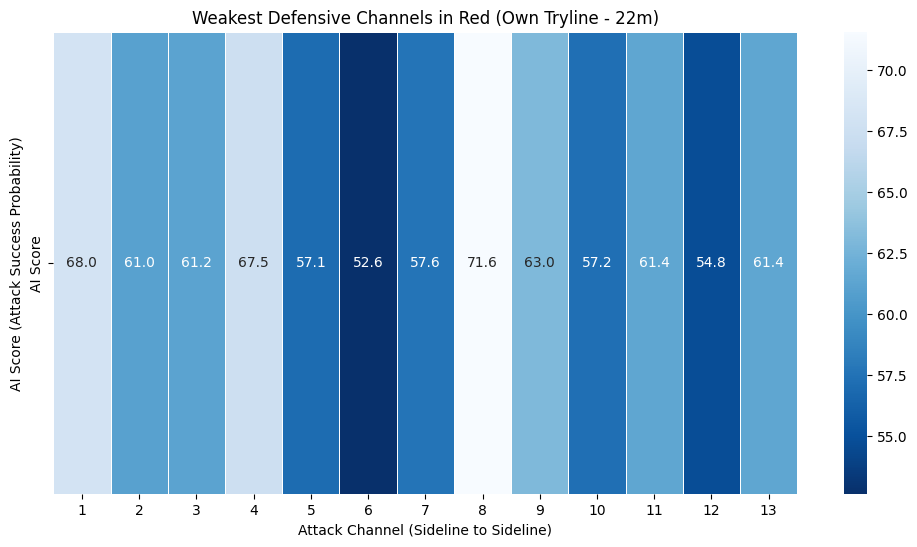

In [13]:
# Install ipywidgets in Colab if not already installed
!pip install ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load dataset
df_uploaded = pd.read_csv("/content/Rugby_AI_Dataset.csv")

# Convert Zone names to numeric values
zone_mapping = {"Red": 0, "Blue": 1, "Yellow": 2, "Green": 3}
df_uploaded["Zone"] = df_uploaded["Zone"].map(zone_mapping)

# Define zone labels
zone_labels = {
    0: "Red (Own Tryline - 22m)",
    1: "Blue (22m - 50m)",
    2: "Yellow (50m - Opp. 22m)",
    3: "Green (Opp. 22m - Tryline)"
}

# Create options list for dropdown
dropdown_options = [(zone_labels[i], i) for i in sorted(df_uploaded["Zone"].unique())]

# Create dropdown with proper options format
zone_selector = widgets.Dropdown(
    options=dropdown_options,
    value=0,  # Set default value to 0 (Red zone)
    description="Select Zone:"
)

# Function to update visualization based on selected zone
def update_visualization(selected_zone):
    # Filter dataset based on the selected zone
    df_zone = df_uploaded[df_uploaded["Zone"] == selected_zone]

    # Pivot DataFrame for visualization
    heatmap_data = df_zone.pivot_table(index="Channel", values="AI Score", aggfunc="mean")
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Generate heatmap
    sns.heatmap(heatmap_data.T, cmap="Blues_r", annot=True, fmt=".1f", linewidths=0.5, cbar=True, ax=ax)

    # Formatting
    ax.set_title(f"Weakest Defensive Channels in {zone_labels[selected_zone]}")
    ax.set_xlabel("Attack Channel (Sideline to Sideline)")
    ax.set_ylabel("AI Score (Attack Success Probability)")

    plt.show()

# Create and display the interactive widget
interactive_plot = widgets.interactive(update_visualization, selected_zone=zone_selector)
display(interactive_plot)

# Generate initial visualization
update_visualization(0)  # Start with Red zone (0)

interactive(children=(Dropdown(description='Select Zone:', options=(('Red (Own Tryline - 22m)', 0), ('Blue (22…

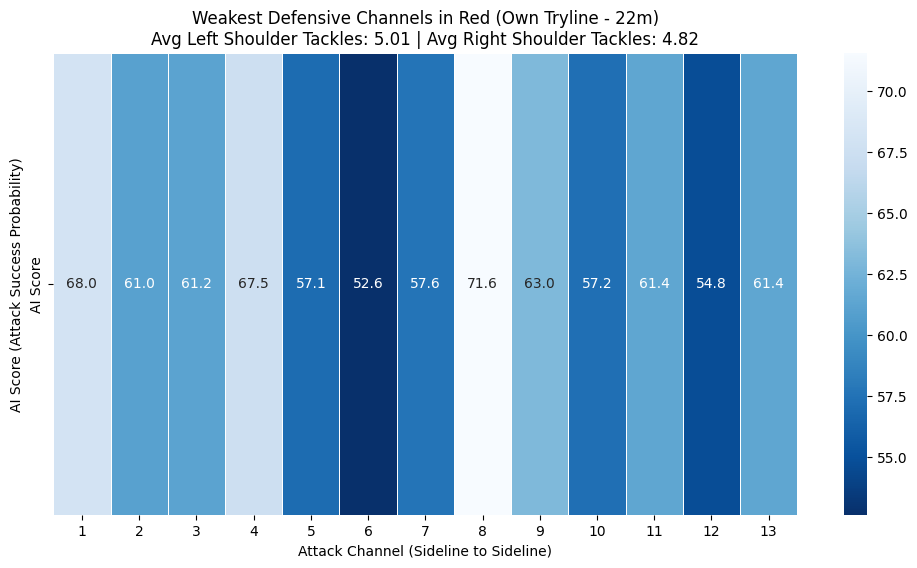


📌 **AI Attack Recommendations Based on Shoulder Weaknesses:**
🔹 **Attack the RIGHT Shoulder** – Defenders struggle on the right side. Use **cut-back plays & crash runners into this gap.**


In [14]:
# Install ipywidgets in Colab if not already installed
!pip install ipywidgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load dataset (Replace with actual file path)
df_uploaded = pd.read_csv("/content/Rugby_AI_Dataset.csv")

# Convert Zone names to numeric values
zone_mapping = {"Red": 0, "Blue": 1, "Yellow": 2, "Green": 3}
df_uploaded["Zone"] = df_uploaded["Zone"].map(zone_mapping)

# Calculate average Left Shoulder and Right Shoulder values per Zone
zone_shoulder_data = df_uploaded.groupby("Zone")[["Left Shoulder", "Right Shoulder"]].mean().reset_index()

# Merge the new shoulder calculations back into the main dataset
df_uploaded = df_uploaded.merge(zone_shoulder_data, on="Zone", suffixes=("", "_Zone_Avg"))

# Define the four zones for visualization
zone_labels = {
    0: "Red (Own Tryline - 22m)",
    1: "Blue (22m - 50m)",
    2: "Yellow (50m - Opp. 22m)",
    3: "Green (Opp. 22m - Tryline)"
}

# Create options list for dropdown
dropdown_options = [(zone_labels[i], i) for i in sorted(df_uploaded["Zone"].unique())]

# Dropdown selector for filtering zones
zone_selector = widgets.Dropdown(
    options=dropdown_options,
    value=0,  # Default to Red Zone
    description="Select Zone:"
)

# Function to update visualization including Left Shoulder & Right Shoulder data
def update_visualization(selected_zone):
    # Filter dataset based on the selected zone
    df_zone = df_uploaded[df_uploaded["Zone"] == selected_zone]

    # Pivot DataFrame for visualization
    heatmap_data = df_zone.pivot_table(index="Channel", values="AI Score", aggfunc="mean")
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Calculate Shoulder data for display
    avg_left_shoulder = df_zone["Left Shoulder_Zone_Avg"].mean()
    avg_right_shoulder = df_zone["Right Shoulder_Zone_Avg"].mean()

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Generate heatmap
    sns.heatmap(heatmap_data.T, cmap="Blues_r", annot=True, fmt=".1f", linewidths=0.5, cbar=True, ax=ax)

    # Formatting
    ax.set_title(f"Weakest Defensive Channels in {zone_labels[selected_zone]}\n"
                 f"Avg Left Shoulder Tackles: {avg_left_shoulder:.2f} | Avg Right Shoulder Tackles: {avg_right_shoulder:.2f}")
    ax.set_xlabel("Attack Channel (Sideline to Sideline)")
    ax.set_ylabel("AI Score (Attack Success Probability)")

    plt.show()

    # **AI-Driven Attack Recommendations Based on Shoulder Data**
    print("\n📌 **AI Attack Recommendations Based on Shoulder Weaknesses:**")

    if avg_left_shoulder < avg_right_shoulder:
        print("🔹 **Attack the LEFT Shoulder** – Defenders are weaker in left shoulder tackles. Use **inside switches & step-offs** to exploit this.")
    elif avg_right_shoulder < avg_left_shoulder:
        print("🔹 **Attack the RIGHT Shoulder** – Defenders struggle on the right side. Use **cut-back plays & crash runners into this gap.**")
    else:
        print("🔹 **Balanced Shoulder Defense** – No clear weakness. Use **decoy plays & offloads to create gaps.**")

# Create and display the interactive widget
interactive_plot = widgets.interactive(update_visualization, selected_zone=zone_selector)
display(interactive_plot)

# Generate initial visualization for the default zone (Red Zone)
update_visualization(0)
